# Deep Learning on Titanic dataset (kaggle) using TensorFlow
---------------------------

https://www.kaggle.com/c/titanic

### Let's import packages and dataset

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from collections import Counter
from IPython.display import clear_output

In [2]:
df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df['name_length'] = df['Name'].apply(len)
df['ticket_length'] = df['Ticket'].apply(len)

test_df['name_length'] = test_df['Name'].apply(len)
test_df['ticket_length'] = test_df['Ticket'].apply(len)

In [4]:
df = df[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','name_length','ticket_length']]
test_df = test_df[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','name_length','ticket_length']]

## Clean Data

In [5]:
df = df.fillna(df.mean())
df = df[df['Embarked'].notnull()]
df.isnull().sum() #Because only 2 people don't hve embarked. We will ignore them

test_df = test_df.fillna(df.mean())
test_df['Embarked'].fillna("S")
test_df.isnull().sum()

Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
name_length      0
ticket_length    0
dtype: int64

## Convert categorical feature to one hot.

In [6]:
def Sex2Num(sex):
    if(sex=='male'):return 1
    elif(sex=='female'):return 2
    else: return 0
df['Sex'] = df['Sex'].apply(Sex2Num)
test_df['Sex'] = test_df['Sex'].apply(Sex2Num)

In [7]:
embarked = pd.get_dummies(df['Embarked'])
Pclasses = pd.get_dummies(df['Pclass'],prefix='class')
newDf = pd.concat([df,embarked,Pclasses],axis=1)
print(newDf.columns)
newDf = newDf[['Survived','Sex','Age','SibSp','Parch','Fare','name_length','ticket_length','S','Q','class_2', 'class_3']]
newDf.head()

embarked = pd.get_dummies(test_df['Embarked'])
Pclasses = pd.get_dummies(test_df['Pclass'],prefix='class')
test_df = pd.concat([test_df,embarked,Pclasses],axis=1)
print(test_df.columns)
test_df = test_df[['Sex','Age','SibSp','Parch','Fare','name_length','ticket_length','S','Q','class_2', 'class_3']]
test_df.head()

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'name_length', 'ticket_length', 'C', 'Q', 'S', 'class_1',
       'class_2', 'class_3'],
      dtype='object')
Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'name_length', 'ticket_length', 'C', 'Q', 'S', 'class_1', 'class_2',
       'class_3'],
      dtype='object')


,Sex,Age,SibSp,Parch,Fare,name_length,ticket_length,S,Q,class_2,class_3
0,1,34.5,0,0,7.8292,16,6,0.0,1.0,0.0,1.0
1,2,47.0,1,0,7.0000,32,6,1.0,0.0,0.0,1.0
2,1,62.0,0,0,9.6875,25,6,0.0,1.0,1.0,0.0
3,1,27.0,0,0,8.6625,16,6,1.0,0.0,0.0,1.0
4,2,22.0,1,1,12.2875,44,7,1.0,0.0,0.0,1.0


## Set X_train, X_val,X_test

In [8]:
X = newDf.iloc[:,1:]
Y = newDf.iloc[:,0:1].values

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.1, random_state=42)


X_test = test_df
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
X_test.head()

(800, 11)
(89, 11)
(418, 11)


,Sex,Age,SibSp,Parch,Fare,name_length,ticket_length,S,Q,class_2,class_3
0,1,34.5,0,0,7.8292,16,6,0.0,1.0,0.0,1.0
1,2,47.0,1,0,7.0000,32,6,1.0,0.0,0.0,1.0
2,1,62.0,0,0,9.6875,25,6,0.0,1.0,1.0,0.0
3,1,27.0,0,0,8.6625,16,6,1.0,0.0,0.0,1.0
4,2,22.0,1,1,12.2875,44,7,1.0,0.0,0.0,1.0


In [9]:
X.head()

,Sex,Age,SibSp,Parch,Fare,name_length,ticket_length,S,Q,class_2,class_3
0,1,22.0,1,0,7.2500,23,9,1.0,0.0,0.0,1.0
1,2,38.0,1,0,71.2833,51,8,0.0,0.0,0.0,0.0
2,2,26.0,0,0,7.9250,22,16,1.0,0.0,0.0,1.0
3,2,35.0,1,0,53.1000,44,6,1.0,0.0,0.0,0.0
4,1,35.0,0,0,8.0500,24,6,1.0,0.0,0.0,1.0


In [10]:
X_train.head()

,Sex,Age,SibSp,Parch,Fare,name_length,ticket_length,S,Q,class_2,class_3
77,1,29.699118,0,0,8.0500,24,6,1.0,0.0,0.0,1.0
744,1,31.000000,0,0,7.9250,18,17,1.0,0.0,0.0,1.0
474,2,22.000000,0,0,9.8375,27,4,1.0,0.0,0.0,1.0
212,1,22.000000,0,0,7.2500,22,9,1.0,0.0,0.0,1.0
719,1,33.000000,0,0,7.7750,28,6,1.0,0.0,0.0,1.0


In [11]:
X_val.head()

,Sex,Age,SibSp,Parch,Fare,name_length,ticket_length,S,Q,class_2,class_3
281,1,28.0,0,0,7.8542,32,6,1.0,0.0,0.0,1.0
435,2,14.0,1,2,120.0000,25,6,1.0,0.0,0.0,0.0
39,2,14.0,1,0,11.2417,27,4,0.0,0.0,0.0,1.0
418,1,30.0,0,0,13.0000,26,5,1.0,0.0,1.0,0.0
585,2,18.0,0,2,79.6500,19,6,1.0,0.0,0.0,0.0


## Preprocess so that all will have same scale

In [12]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)
X_test = sc.transform(X_test)
X = sc.transform(X)

In [13]:
print(X.shape)
print(Y.shape)

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(889, 11)
(889, 1)
(800, 11)
(89, 11)
(418, 11)


## Training

In [73]:
# Parameters
learning_rate = 0.0001
training_epochs = 1500
batch_size = 500
display_step = 10

# Network Parameters
n_hidden_1 = 1024 # 1st layer number of features
n_hidden_2 = 1024-128 # 2nd layer number of features
n_hidden_3 = 1024-256
n_hidden_4 = 512
alpha = 0.05
n_input = X.shape[1] # MNIST data input (img shape: 28*28)
n_classes = Y.shape[1] # MNIST total classes (0-9 digits)
keep_prob = 0.8

In [74]:
# tf Graph input
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])
training = tf.placeholder(tf.bool)
"""
z1 = tf.layers.dense(x, n_hidden_1, activation=tf.nn.relu)

z2 = tf.layers.dense(z1, n_hidden_2, activation=tf.nn.relu)
z3 = tf.layers.dense(z2, n_hidden_3, activation=tf.nn.relu)
logits = tf.layers.dense(z3, 1, activation=tf.nn.sigmoid)
"""

def myDense(i,row,col):
    w = tf.Variable(tf.random_normal([row,col]))
    b = tf.Variable(tf.zeros([col]))
    a = tf.matmul(i,w)+b
    z = tf.nn.relu(a)
    if(training is not None): z = tf.nn.dropout(z, keep_prob)
    else: z *=keep_prob
    return z
""" The same as-->
#Hidden Layer 1
w1 = tf.Variable(tf.random_normal([n_input,n_hidden_1]))
b1 = tf.Variable(tf.zeros([n_hidden_1]))
a1 = tf.matmul(x,w1)+b1
z1 = tf.nn.relu(a1)
if(training is not None): z1 = tf.nn.dropout(z1, keep_prob)
else: z1 *=keep_prob
#Hidden layer 2
w2 = tf.Variable(tf.random_normal([n_hidden_1,n_hidden_2]))
b2 = tf.Variable(tf.zeros([n_hidden_2]))
a2 = tf.matmul(z1,w2)+b2
z2 = tf.nn.relu(a2)
if(training is not None): z2 = tf.nn.dropout(z2, keep_prob)
else: z2 *=keep_prob
#Hidden layer 3
w3 = tf.Variable(tf.random_normal([n_hidden_2,n_hidden_3]))
b3 = tf.Variable(tf.zeros([n_hidden_3]))
a3 = tf.matmul(z2,w3)+b3
z3 = tf.nn.relu(a3)
if(training is not None): z3 = tf.nn.dropout(z3, keep_prob)
else: z3 *=keep_prob
#Hidden layer 4
w4 = tf.Variable(tf.random_normal([n_hidden_3,n_hidden_4]))
b4 = tf.Variable(tf.zeros([n_hidden_4]))
a4 = tf.matmul(z3,w4)+b4
z4 = tf.nn.relu(a4)
if(training is not None): z4 = tf.nn.dropout(z4, keep_prob)
else: z4 *=keep_prob
#Output layer
w5 = tf.Variable(tf.random_normal([n_hidden_4,n_classes]))
b5 = tf.Variable(tf.zeros([n_classes]))
a5 = tf.matmul(z4,w5)+b5
logits = a5#tf.nn.sigmoid(a4)  # No sigmoid is better because cross entropy already use sigmoid in the cost. So if sigmoid here-> sigmoid 2 times.
"""
z1 = myDense(x,n_input,n_hidden_1)
z2 = myDense(z1,n_hidden_1,n_hidden_2)
z3 = myDense(z2,n_hidden_2,n_hidden_3)
z4 = myDense(z3,n_hidden_3,n_hidden_4)
w5 = tf.Variable(tf.random_normal([n_hidden_4,n_classes]))
b5 = tf.Variable(tf.zeros([n_classes]))
a5 = tf.matmul(z4,w5)+b5
logits = a5

cross_entropy = tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=logits)
cost = tf.reduce_mean(cross_entropy) + alpha*tf.nn.l2_loss(w1) + alpha*tf.nn.l2_loss(w2)+ alpha*tf.nn.l2_loss(w3)+ alpha*tf.nn.l2_loss(w4)

optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

#Because we did not use sigmoid on output, we will use it here
activated_output = tf.nn.sigmoid(logits)
predicted_class = tf.greater(activated_output,0.5)
correct = tf.equal(predicted_class, tf.equal(y,1))
accuracy = tf.reduce_mean( tf.cast(correct, 'float') )

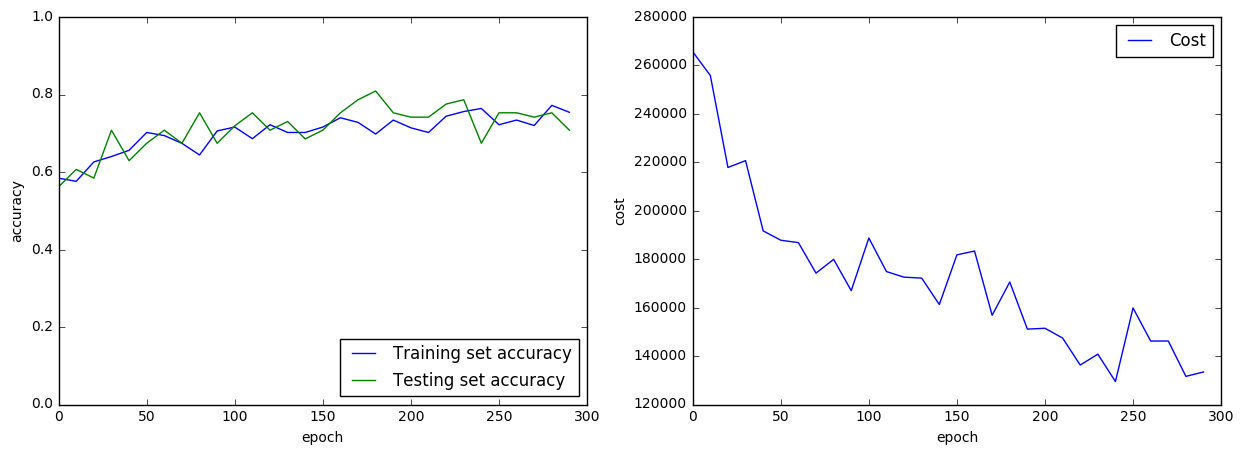

In [72]:
def plot_accuracy():
    
    fig,ax = plt.subplots(1,2,figsize=(15,5))
    
    
    ax[0].plot(epoch_set,train_acc_set, '-',label='Training set accuracy')
    ax[0].plot(epoch_set,val_acc_set, '-',label='Testing set accuracy')
    ax[0].set_ylabel('accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylim((0,1))
    ax[0].set_xlim((0,training_epochs))
    ax[0].legend(loc=4)
    
    ax[1].plot(epoch_set,avg_set, '-',label='Cost')
    ax[1].set_ylabel('cost')
    ax[1].set_xlabel('epoch')
    #plt.ylim((0,1))
    ax[1].set_xlim((0,training_epochs))
    ax[1].legend()
    plt.show()

Epoch: 1491
cost = 74692.789062
Accuracy: 0.784000
Accuracy(val): 0.752809
Counter({0.0: 49, 1.0: 40})


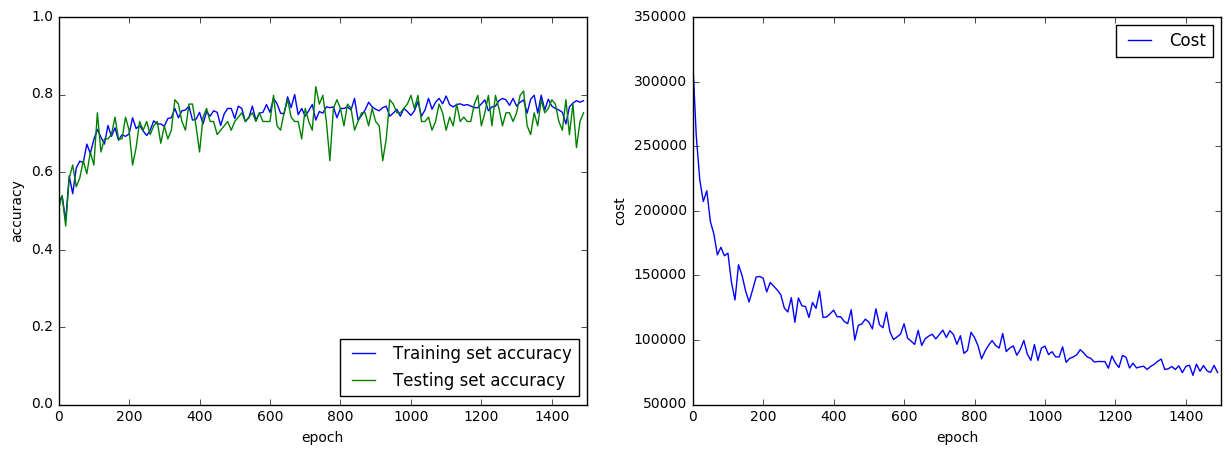

 Training phase finished
MODEL accuracy: 0.785152
MODEL(train) accuracy: 0.7975
MODEL(val) accuracy: 0.741573


In [75]:
avg_set = []
train_acc_set = []
val_acc_set = []
epoch_set=[]


init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(training_epochs):
        avg_cost = 0
        avg_acc = 0
        val_avg_acc = 0
        total_batch = int(X_train.shape[0]/batch_size)
        for i in range(total_batch):
            selectedSamples  = random.sample(list(np.arange(X_train.shape[0])),batch_size)

            batch_xs, batch_ys = X_train[selectedSamples],y_train[selectedSamples]
            sess.run(optimizer, feed_dict={x: batch_xs, y: batch_ys,training:True})
            loss = sess.run(cost, feed_dict={x: batch_xs,y: batch_ys,training:True})/total_batch
            avg_cost+=(loss/total_batch)
            #Get accuracy of this batch
            acc = sess.run(accuracy,feed_dict={x:batch_xs,y:batch_ys,training:True})/total_batch
            avg_acc+=acc
            #Get accuracy from validation set using this batch weights
            valacc = accuracy.eval({x:X_val,y:y_val})/total_batch#sess.run(accuracy,feed_dict={x:X_val,y:y_val})/total_batch
            val_avg_acc+=valacc
        if epoch % display_step == 0:
            clear_output()
            print("Epoch:",'%04d' % (epoch+1))
            print("cost = %f"%avg_cost)
            print("Accuracy: %f"%avg_acc)
            print("Accuracy(val): %f"%val_avg_acc)
            avg_set.append(avg_cost)
            train_acc_set.append(avg_acc)
            val_acc_set.append(val_avg_acc)
            epoch_set.append(epoch)
            pred = activated_output.eval({x:X_val,y:y_val})
            print(Counter([list(i)[0] for i in list(pred)]))

            plot_accuracy()

    print(" Training phase finished")
    print("MODEL accuracy:", accuracy.eval({x: X,y:Y}))
    print("MODEL(train) accuracy:", accuracy.eval({x: X_train,y:y_train}))
    print("MODEL(val) accuracy:", accuracy.eval({x: X_val,y:y_val}))
    pred = predicted_class.eval(feed_dict={x:X_test})

In [66]:
Counter([list(i)[0] for i in list(pred)])

Counter({False: 228, True: 190})

In [67]:
test_df_reload = pd.read_csv('test.csv')

In [68]:
prediction2 = pred.astype(int).ravel()
d = {'PassengerId':test_df_reload['PassengerId'].values,'Survived':prediction2}
ans_df = pd.DataFrame(d)
ans_df.to_csv("titanic_deep_tf4.csv",index=False)

In [ ]:
ans_df